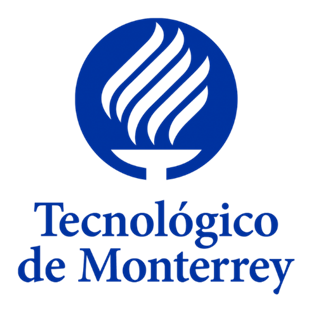 

Instituto Tecnológico y de Estudios Superiores de Monterrey
 

SEMANA 3 - ACTIVIDAD 1
Conceptos de almacenamiento y recuperación de información
 


Liliana del Pilar Pineda González - A01793685

Ricardo Loor - A01793943


Parte 1: Fundamentos de bases de datos

1.	Fundamentos de bases de datos y para ciencia de datos
-	Las bases de datos son un conjunto estructurado de datos guardados en la memoria de una computadora o en la nube al que se puede acceder de varias maneras. 
-	Se utilizan con catálogos o meta-datos y se agrupan en entidades, atributos y relaciones.
-	Se componen de una o más listas “tablas” de datos organizados por columnas, filas y celdas.
-	La ciencia de datos recopila, limpia, analiza, visualiza y usa los datos para mejorar nuestra vida.
-	Los científicos de datos dedican el 80% del tiempo a la recopilación (20%) y limpieza (60%) de las bases de datos.
-	Pueden existir: 
o	Base de datos relacional, donde los datos se organizan y almacenan en tablas que se pueden vincular entre sí mediante alguna relación. Lenguaje SQL. ventajas: 
	Flexibilidad
	Facilidad de uso 
	Sin redundancia
	Confiabilidad
o	Bases de datos no relacionales, conocidas como NoSQL, conectan la información almacenada en ellas por categorías más que por relaciones.

2.	Fundamentos de almacenes de datos (Data Warehouse) para ciencia de datos.
-	Data warehouse: repositorio unificado para todos los datos que recogen los diversos sistemas de información. 
-	Desafíos: normalización, comparabilidad, tratamiento de datos faltantes y tratamiento de datos corruptos o valores atípicos
-	Tipos de datos faltantes: completamente aleatorios (MCAR), aleatorios (MAR) y no aleatorios (MNAR).
-	Técnicas para manejar los datos faltantes son: eliminación por lista, eliminación por parejas, sustitución media, imputación de regresión, imputación Múltiple.
-	Para identificar valores atípicos y datos ruidosos se utilizan: agrupación y boxplots.


In [ ]:
#importar librerías

import pandas as pd
import numpy as np

#leer archivo CSV
df = pd.read_csv('/content/data.csv', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [ ]:
#Renombrar las columnas
df = df.rename(columns={'X1': 'Given Credit', 'X2': 'Gender', 'X3': 'Education', 'X4': 'Marital Status', 'X5': 'Age', 'X6': 'H_Sept', 'X7': 'H_Aug', 'X8': 'H_Jul', 'X9': 'H_Jun', 'X10': 'H_May', 'X11': 'H_Apr', 'X12': 'BS_September', 'X13': 'BS_Aug', 'X14': 'BS_Jul', 'X15': 'BS_Jun', 'X16': 'BS_May', 'X17': 'BS_Aprl', 'X18': 'PP_September', 'X19': 'PP_Aug', 'X20': 'PP_Jul', 'X21': 'PP_Jun', 'X22': 'PP_May', 'X23': 'PP_Aprl'})
df

,newName1,Gender,Education,Marital Status,Age,H_April,H_May,H_June,H_July,H_August,...,BS_Jun,BS_May,BS_Aprl,PP_September,PP_Aug,PP_Jul,PP_Jun,PP_May,PP_Aprl,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [ ]:
#Verificar si hay datos nulos

df.isnull().values.any()

True

In [ ]:
df.isnull().any()

newName1          False
Gender             True
Education          True
Marital Status     True
Age                True
H_April            True
H_May              True
H_June             True
H_July             True
H_August           True
H_September        True
BS_September       True
BS_Aug             True
BS_Jul             True
BS_Jun             True
BS_May             True
BS_Aprl            True
PP_September       True
PP_Aug             True
PP_Jul             True
PP_Jun             True
PP_May             True
PP_Aprl            True
Y                  True
dtype: bool

In [ ]:
#Obtenemos el numero de registros nulos

df.isna().sum() 

newName1           0
Gender             1
Education          2
Marital Status     2
Age                5
H_April            3
H_May              5
H_June             7
H_July             9
H_August          16
H_September       14
BS_September      11
BS_Aug            11
BS_Jul            13
BS_Jun            15
BS_May            17
BS_Aprl           10
PP_September       8
PP_Aug             9
PP_Jul             8
PP_Jun            11
PP_May            11
PP_Aprl            5
Y                  3
dtype: int64

In [ ]:
#Sumamos el sum para tener el total de registros nulos
df.isna().sum().sum()

196

In [ ]:
#Creamos una copia del df para verificar el numero de datos que se eliminaran

cdf = df.copy()

cdf.dropna(inplace = True)

print("Columnas del dataframe: ", df.shape[0])
print("Columnas de la copia del dataframe: ", cdf.shape[0])

print("Se eliminarian: ", df.shape[0]- cdf.shape[0]," Rows")


Columnas del dataframe:  30000
Columnas de la copia del dataframe:  29958
Se eliminarian:  42  Rows


In [ ]:
#Eliminamos los registros null del df original
df.dropna(inplace = True)

#Verificamos que no hayan duplicados
df.isnull().values.any()

False

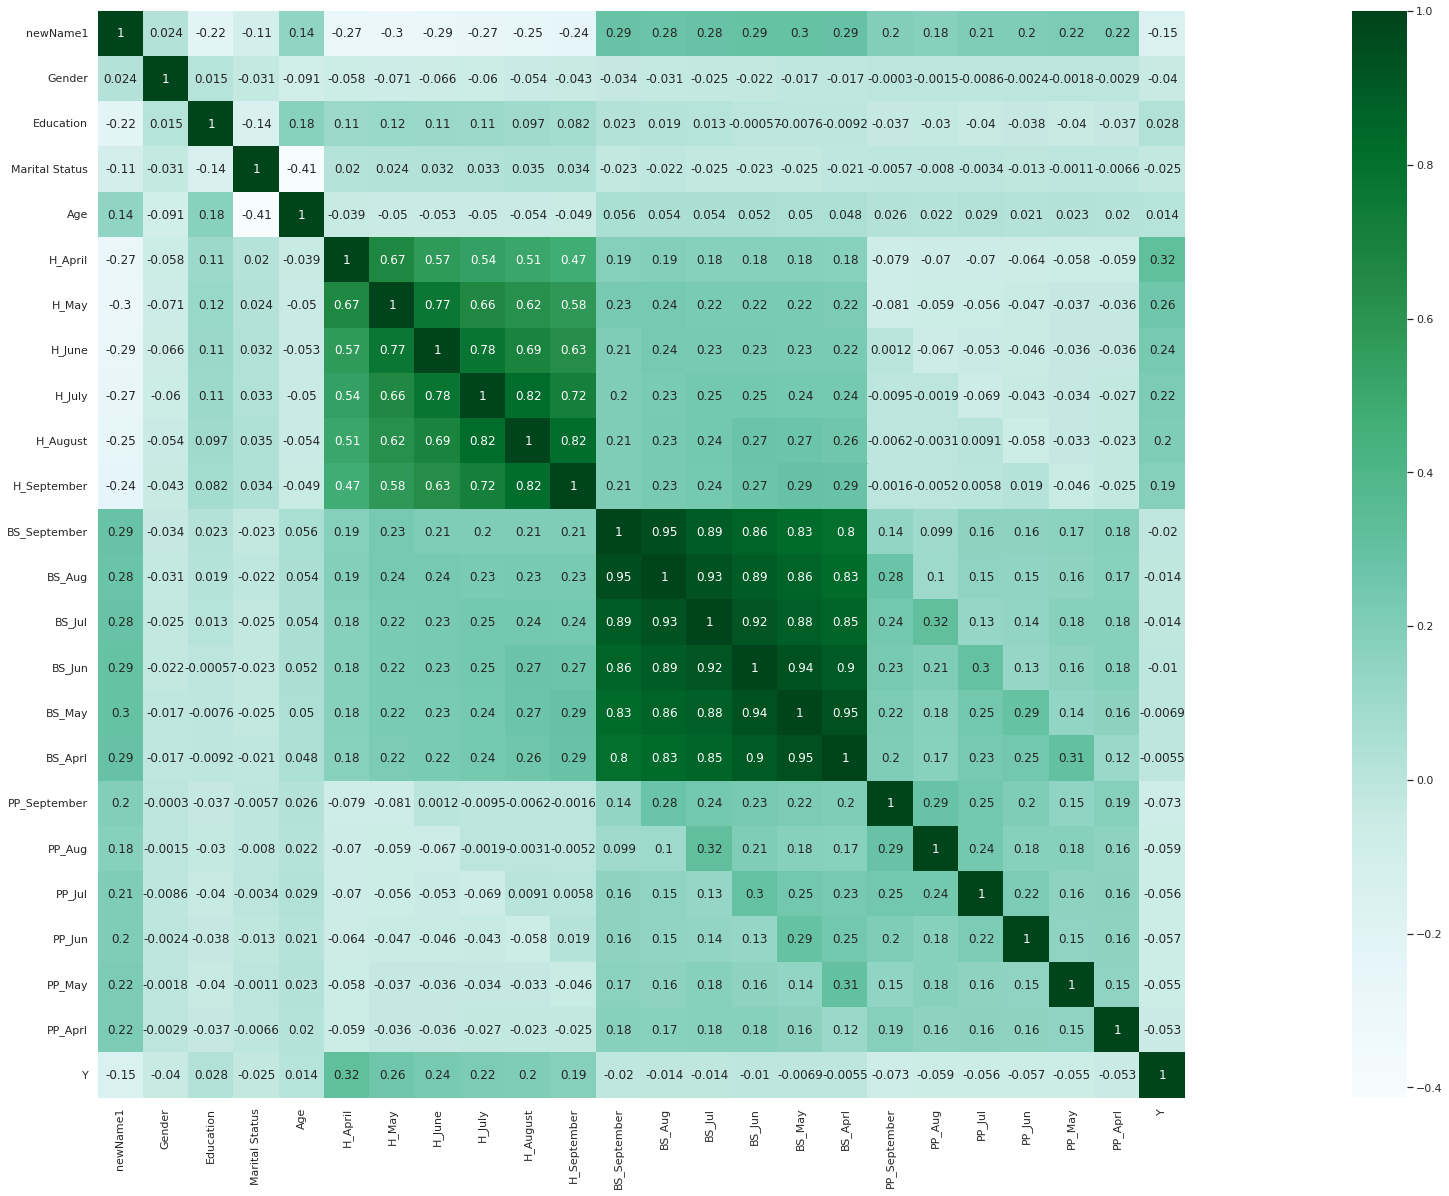

In [ ]:
#Graficamos un heatmap para comparar el dataframe con y sin la limpieza de datos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  

sns.set(rc={'figure.figsize':(60,20)}) 

sns.heatmap(df.corr(), cmap = "BuGn", square = True, annot = True)

plt.show()

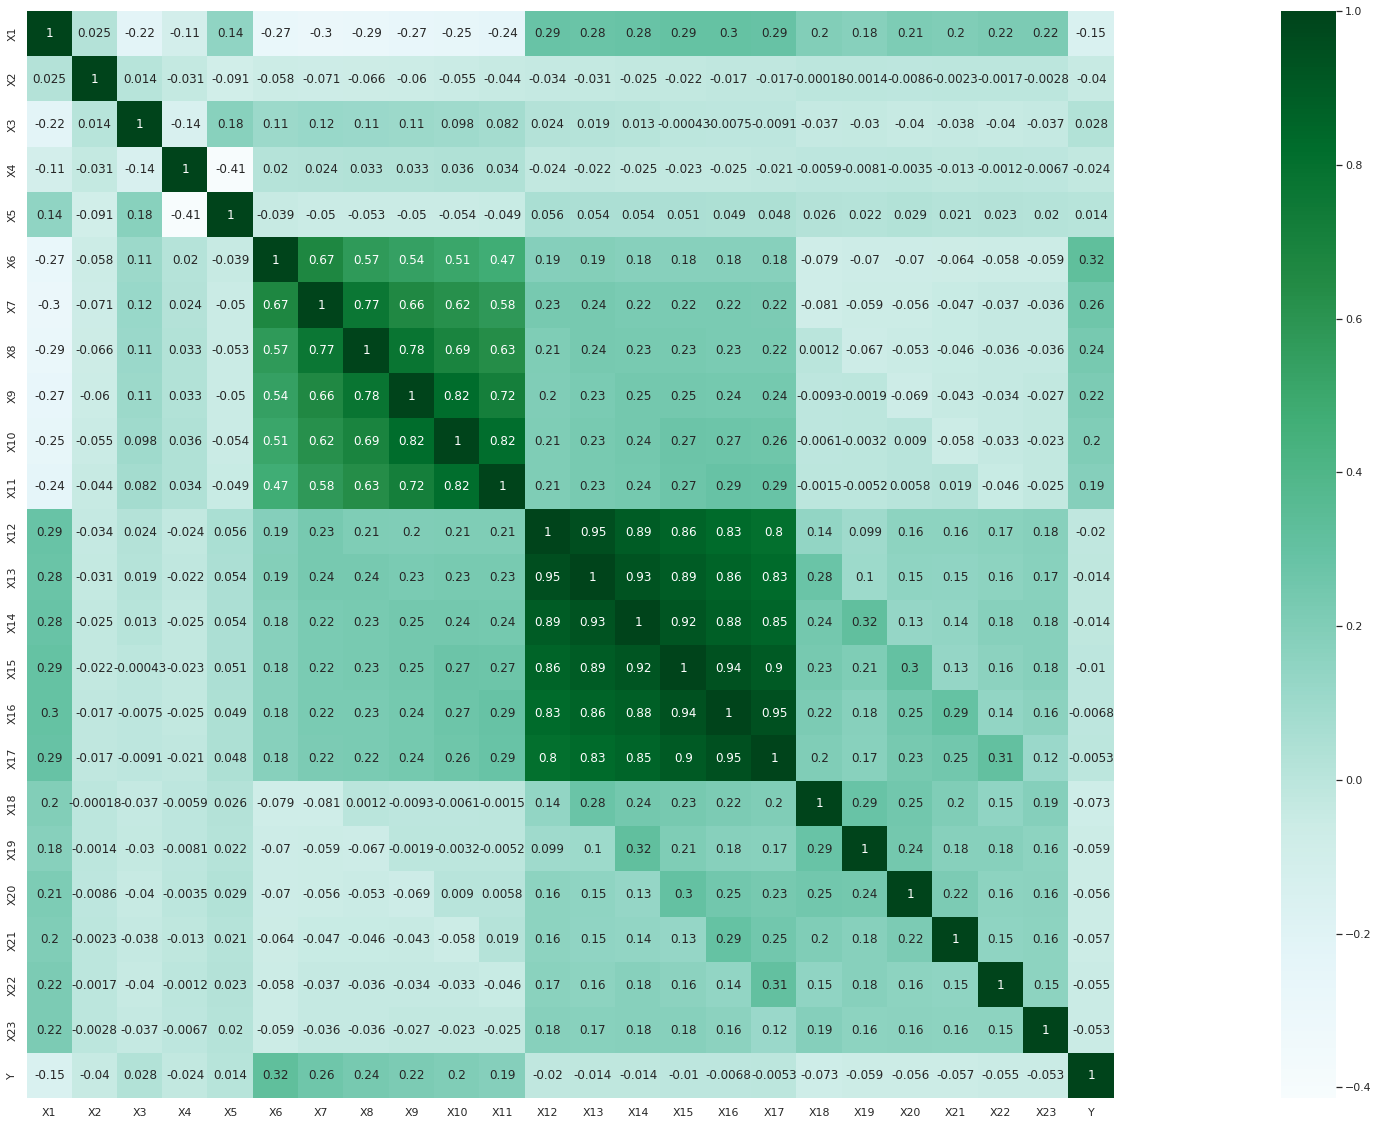

In [ ]:
sns.set(rc={'figure.figsize':(60,20)}) 

org = pd.read_csv('/content/data.csv', index_col=0)

sns.heatmap(org.corr(), cmap = "BuGn", square = True, annot = True)

plt.show()

**Parte 3: Preparación de los datos**

1.	¿Qué datos considero más importantes? ¿Por qué?
Los datos más importantes son los del historial de pagos pasados y los del importe de la factura. Consideramos que son los más importantes debido a que son los datos que poseen la mayor correlación entre todas las columnas de la base de datos. De igual manera, esto datos pueden ser considerados como los principales del ejercicio, ya que con ellos se puede obtener la mayor información y pueden ser utilizados para entrenar modelos que permitan determinar la probabilidad de que una persona no pague sus tarjetas de crédito.
2.	¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?
Los datos nulos se eliminaron. Esta decisión se tomó basándonos en el número de rows que contenían nulos (42 registros), ya que este número no comprende un porcentaje que pueda cambiar significativamente el comportamiento de las operaciones que se realicen en la base.
3.	¿Es necesario limpiar los datos para el análisis? Sí / No / ¿Por qué?
Consideramos que sí es necesario limpiar los datos, porque de esta manera podemos obtener mejores resultados a la hora de ejecutar modelos de predicción. Lo anterior, dado que, al limpiar y depurar la data, vamos a tener la seguridad de que la información procesada va a ser precisa y útil.
4.	¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.
Los datos en el mundo real rara vez son homogéneos y directamente intuitivos. Los datos nulos generan algunos posibles sesgos en el análisis por eso hay necesidad de eliminarlos cuando no son significativos como en este caso que equivalen a 0,6% o rellenarlos con alguna técnica. También vemos números negativos que pueden resultar erróneos para variables cuyos números deben ser positivos o también outliers que requieren de normalización. 
5.	¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?
En el proceso de limpieza de datos se realizaron dos ajustes principales, el primero fue cambiar los atributos (nombres de las columnas) por unos labels más entendibles, esto se realizó con la finalidad de mostrar los resultados del dataframe de una manera más legible. 
Posteriormente, procedimos a evaluar la posible eliminación de registros. Para esto buscamos la precencia de valores nulos en la base de datos y, una vez nos dimos cuenta de que sí existían. Revisamos el impacto que tendría la eliminación de estos registros, y, al darnos cuenta de que este no era mayor, procedimos a eliminar las rows con valores nulos.




BIBLIOGRAFÍA

-	Data Warehouse: todo lo que necesitas saber sobre almacenamiento de datos. Recuperado de: Www.Powerdata.Es/Data-Warehouse. Fecha de consulta: 3 de octubre de 2022.
-	Kane, F. (2017). Hands-on data science and python machine learning. Packt Publishing Ltd.
-	SQL for Data Scientists  A Beginner's Guide for Building Datasets for Analysis, Renee M. P. Teate.
-	Conceptos relacionados con el almacenamiento de datos. Recuperado de: https://aws.amazon.com/es/data-warehouse/. Fecha de consulta: 3 de octubre de 2022.
-	Bases de datos 101: Introducción a las bases de datos para científicos de datos. Recuperado de: https://towardsdatascience.com/databases-101-introduction-to-databases-for-data-scientists-ee18c9f0785d. Fecha de consulta: 3 de octubre de 2022.
-	Datos faltantes: dos grandes problemas con la imputación media. Recuperado de: https://www.theanalysisfactor.com/mean-imputation/. Fecha de consulta: 3 de octubre de 2022.
-	Siete formas de recuperar datos: métodos comunes para imputar datos faltantes. Recuperado de: https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/. Fecha de consulta: 3 de octubre de 2022.
